In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
df = pd.read_csv('CSUSHPISA.csv')
df.sample(6)

,DATE,CSUSHPISA
195,2003-04-01,130.884
47,1990-12-01,76.185
361,2017-02-01,187.313
189,2002-10-01,125.735
89,1994-06-01,79.423
356,2016-09-01,182.823


In [36]:
# Convert the data into a DataFrame

df['DATE'] = pd.to_datetime(df['DATE'])  # Convert 'DATE' column to datetime format
df.set_index('DATE', inplace=True)  # Set 'DATE' column as the DataFrame index

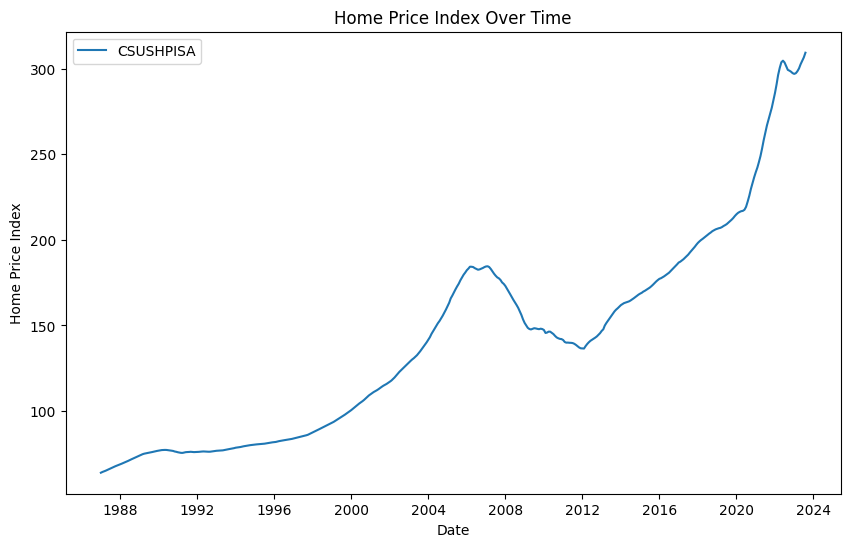

In [37]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['CSUSHPISA'], label='CSUSHPISA')
plt.title('Home Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('Home Price Index')
plt.legend()
plt.show()


In [38]:
# Feature engineering: creating lag features for time series forecasting
df['Month'] = df.index.month
df['Year'] = df.index.year
for i in range(1, 13):
    df[f'lag_{i}'] = df['CSUSHPISA'].shift(i)

In [39]:
# Dropping rows with NaN resulting from the lag shift
df.dropna(inplace=True)

In [40]:
df.sample(6)

,CSUSHPISA,Month,Year,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
DATE,,,,,,,,,,,,,,,
2000-05-01,103.678,5,2000,102.922,102.127,101.339,100.551,99.845,99.154,98.523,97.863,97.219,96.592,95.975,95.344
2015-06-01,171.471,6,2015,170.880,170.298,169.799,169.129,168.634,168.051,167.335,166.641,165.905,165.215,164.579,164.064
2010-04-01,146.403,4,2010,145.859,145.631,147.396,147.929,148.134,147.850,148.025,148.278,148.410,148.090,147.694,147.949
2018-10-01,205.120,10,2018,204.353,203.688,202.907,202.237,201.423,200.655,199.961,199.227,198.314,197.178,195.958,194.805
2000-10-01,107.382,10,2000,106.538,105.768,105.054,104.424,103.678,102.922,102.127,101.339,100.551,99.845,99.154,98.523
2018-06-01,202.237,6,2018,201.423,200.655,199.961,199.227,198.314,197.178,195.958,194.805,193.759,192.663,191.450,190.513


In [41]:
# Selecting features and target variable
X = df.drop(['CSUSHPISA'], axis=1)
y = df['CSUSHPISA']

In [42]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
# Predict on the test set
y_pred = model.predict(X_test)

In [45]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.15144776374549193
R-squared: 0.9999674423449444


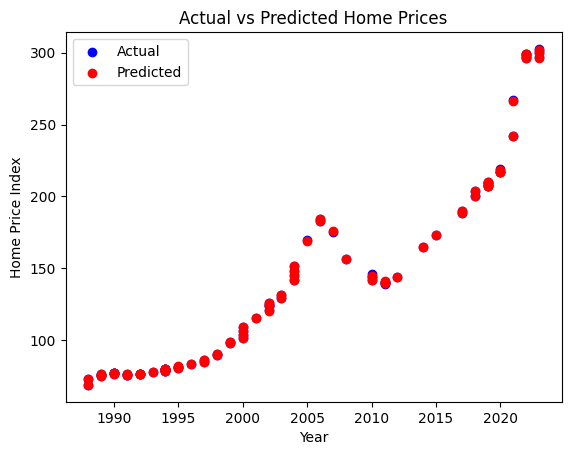

In [46]:
# Visualize predictions against actual values
plt.scatter(X_test['Year'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Year'], y_pred, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Home Price Index')
plt.legend()
plt.title('Actual vs Predicted Home Prices')
plt.show()